In [1]:
import csv
import matplotlib.pyplot as plt
import re

dataset  = "full_dataset.csv"
with open(dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)

     # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    
    new_lignes = []

    for ligne in lignes[1:]:
        if ligne[11] != '':#not in ['Neither','','neither']:
            cont = {'speakers': [], 'phrases': []}
            speaker_info = re.sub(r'<[^>]*>', '', ligne[9])
            speaker_infos = speaker_info[:-1].split('\n')
            for info in speaker_infos:
                l = info.split(': "')
                speakers = l[0]
                phrase = l[1]
                phrase = phrase.replace('"','')
                
                cont['speakers'].append(speakers)
                cont['phrases'].append(phrase)
            # Ajouter le speaker et sa phrase à la nouvelle ligne
            ligne = [cont] + ligne[11:]
            new_lignes.append(ligne)
        
print(len(lignes))
print(len(new_lignes))
print(lignes[0][9],lignes[0][11:])
for i in range(1):
    print(f"Ligne {i+1} :", new_lignes[i],"\n\n")


24711
7161
context ['relation_gold', 'relation_gold_reason', 'sentence_1', 'sentence_2', 'speaker_1', 'speaker_2', 'topic']
Ligne 1 : [{'speakers': ['Kamala Harris', 'Susan Page', 'Susan Page', 'Susan Page', 'Susan Page', 'Susan Page', 'Mike Pence', 'Mike Pence', 'Mike Pence', 'Mike Pence', 'Mike Pence', 'Mike Pence', 'Mike Pence', 'Mike Pence', 'Mike Pence'], 'phrases': ['Please vote.\r', 'Thank you, Senator.\r', 'Vice president Pence, president Trump has several times refused to commit himself to a peaceful transfer of power after the election.\r', 'If vice president Biden is declared the winner and president Trump refuses to accept a peaceful transfer of power, what would be your role and responsibility as vice president?\r', 'What would you personally do?\r', 'You have two minutes.\r', 'Well, Susan, first and foremost, I think we’re going to win this election.\r', 'Because while Joe Biden and Kamala Harris rattle off a long litany of the establishment in Washington, DC and establis

# SVM 

## Abstract Argumentation Framework

K_fold = 5
Scores pour le noyau linear: [0.93440335 1.         0.8777933  0.94622905 0.94622905]
Moyenne des scores pour le noyau linear: 0.940930949252847
Moyenne F1 score pour le noyau linear: 0.610492639252513
Moyenne Precision score pour le noyau linear: 0.8704918032786886
Moyenne Recall score pour le noyau linear: 0.5050359712230216


K_fold = 10
Scores pour le noyau linear: [1.        1.        1.        1.        0.8896648 1.        1.
 1.        1.        1.       ]
Moyenne des scores pour le noyau linear: 0.9889664804469274
Moyenne F1 score pour le noyau linear: 0.9635944700460829
Moyenne Precision score pour le noyau linear: 0.9466216216216216
Moyenne Recall score pour le noyau linear: 1.0


K_fold = 5
Scores pour le noyau poly: [0.93440335 1.         0.8777933  0.94622905 0.94622905]
Moyenne des scores pour le noyau poly: 0.940930949252847
Moyenne F1 score pour le noyau poly: 0.610492639252513
Moyenne Precision score pour le noyau poly: 0.8704918032786886
Moyenne Recall scor

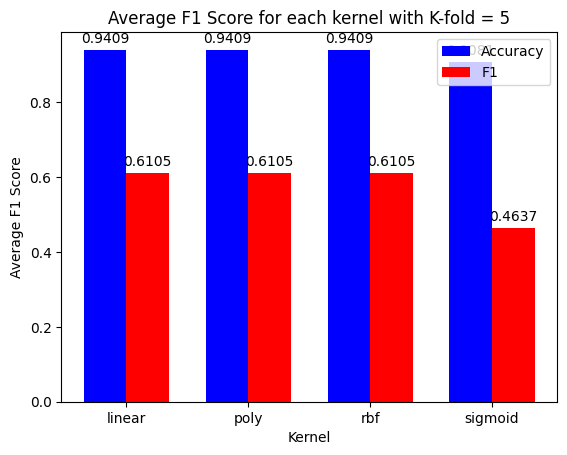

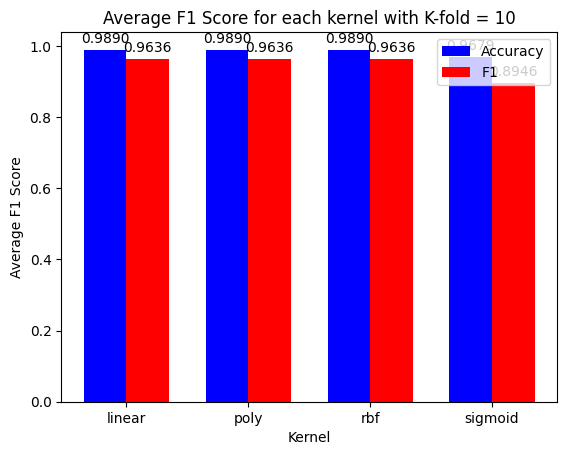

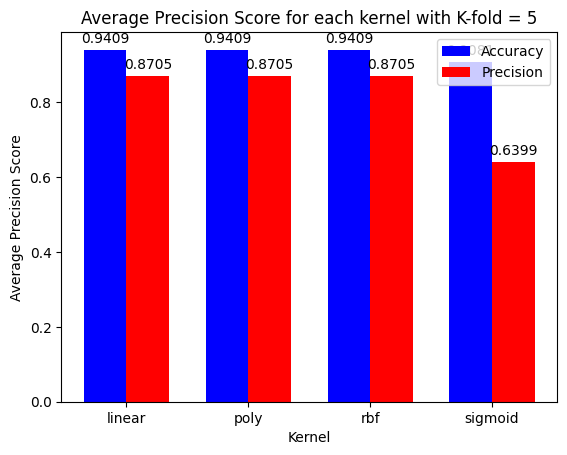

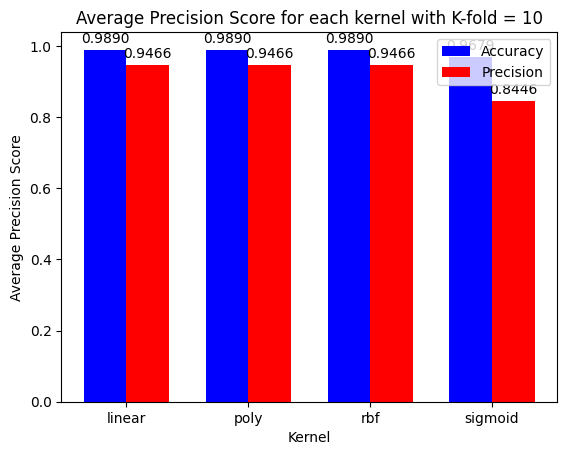

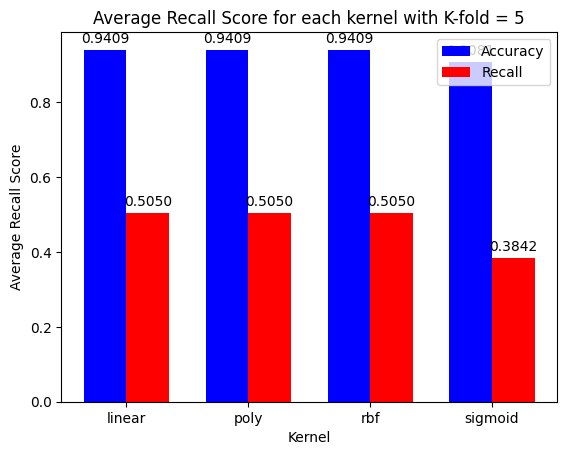

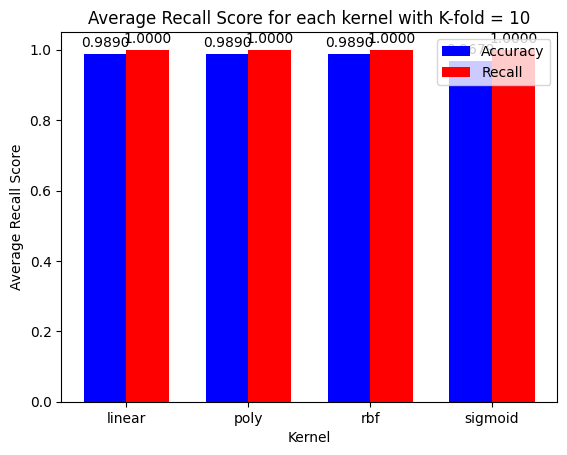

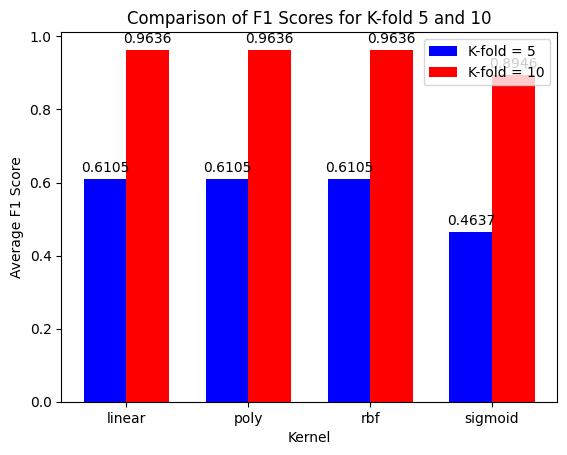

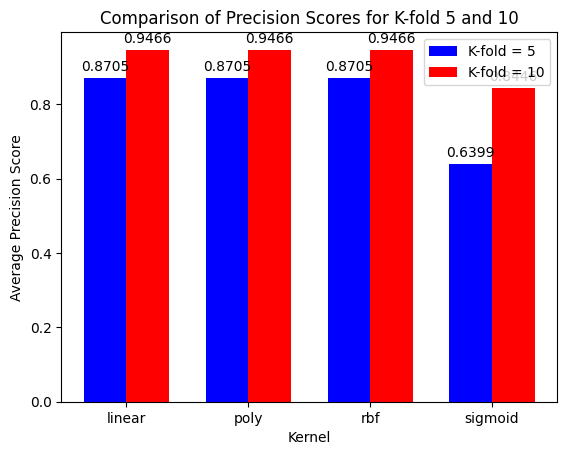

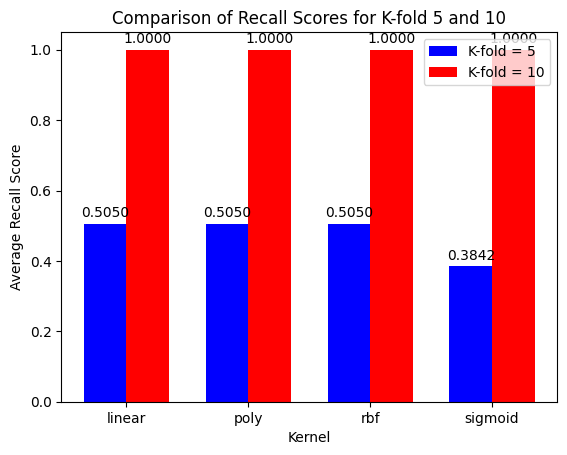

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
import pickle


#['context_speaker', 'context_speach','relation_gold', 'relation_gold_reason', 'sentence_1', 'sentence_2', 'speaker_1', 'speaker_2', 'topic']
X = []
y = []
for ligne in new_lignes:
    X.append(ligne[0]['speakers'] + ligne[0]['phrases'] + ligne[3:])
    if ligne[1] == 'Attack':
        y.append(1)
    else:  # if equal Neither
        y.append(0)

# Preprocess X to ensure each element is a string
X = [' '.join(doc) if isinstance(doc, list) else doc for doc in X]

# Convert the text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Définition des différents noyaux
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Définition du nombre de folds pour la validation croisée
k_fold = [5, 10]

# Scores storage
k_fold_5_scores = {'accuracy': [], 'f1': [], 'precision': [], 'recall': []}
k_fold_10_scores = {'accuracy': [], 'f1': [], 'precision': [], 'recall': []}

for kernel in kernels:
    # Création du classifieur SVM avec le noyau spécifié
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    for k in k_fold:
        # Custom scorers
        scoring = {'accuracy': 'accuracy',
                   'f1': make_scorer(f1_score),
                   'precision': make_scorer(precision_score),
                   'recall': make_scorer(recall_score)}

        # Calcul des scores de validation croisée
        scores = cross_val_score(clf, X_tfidf, y, cv=k, scoring='accuracy')
        f1_scores = cross_val_score(clf, X_tfidf, y, cv=k, scoring=make_scorer(f1_score))
        precision_scores = cross_val_score(clf, X_tfidf, y, cv=k, scoring=make_scorer(precision_score))
        recall_scores = cross_val_score(clf, X_tfidf, y, cv=k, scoring=make_scorer(recall_score))

        # Affichage des résultats
        print(f"K_fold = {k}")
        print(f"Scores pour le noyau {kernel}: {scores}")
        print(f"Moyenne des scores pour le noyau {kernel}: {np.mean(scores)}")
        print(f"Moyenne F1 score pour le noyau {kernel}: {np.mean(f1_scores)}")
        print(f"Moyenne Precision score pour le noyau {kernel}: {np.mean(precision_scores)}")
        print(f"Moyenne Recall score pour le noyau {kernel}: {np.mean(recall_scores)}")
        print("\n")

        if kernel == 'poly' and k == 10:
            # Save the vectorizer and classifier
            with open('vectorizer.pkl', 'wb') as f:
                pickle.dump(vectorizer, f)
            with open('classifier.pkl', 'wb') as f:
                pickle.dump(clf, f)

        if k == 5:
            k_fold_5_scores['accuracy'].append(np.mean(scores))
            k_fold_5_scores['f1'].append(np.mean(f1_scores))
            k_fold_5_scores['precision'].append(np.mean(precision_scores))
            k_fold_5_scores['recall'].append(np.mean(recall_scores))
        else:
            k_fold_10_scores['accuracy'].append(np.mean(scores))
            k_fold_10_scores['f1'].append(np.mean(f1_scores))
            k_fold_10_scores['precision'].append(np.mean(precision_scores))
            k_fold_10_scores['recall'].append(np.mean(recall_scores))

# (Optionnel) Évaluer le modèle sur l'ensemble de test
test_predictions = clf.predict(X_test)
print("Test Accuracy:", (test_predictions == y_test).mean())

# Function to plot the results
def plot_results(scores_dict, k_folds, metric):
    xx = range(len(kernels))  # positions for the kernels
    width = 0.35  # width of the bars

    fig, ax = plt.subplots()

    # Création des barres
    bar1 = ax.bar(xx, scores_dict['accuracy'], width, label='Accuracy', color='b')
    bar2 = ax.bar([p + width for p in xx], scores_dict[metric], width, label=metric.capitalize(), color='r')

    # Configuration des labels et du titre
    ax.set_xlabel('Kernel')
    ax.set_ylabel(f'Average {metric.capitalize()} Score')
    ax.set_title(f'Average {metric.capitalize()} Score for each kernel with K-fold = {k_folds}')
    ax.set_xticks([p + width / 2 for p in xx])
    ax.set_xticklabels(kernels)
    ax.legend()

    # Affichage des scores sur les barres
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # décalage de 3 points vers le haut
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bar1)
    autolabel(bar2)

    # Affichage du graphique
    plt.show()

# Plot for each metric
metrics = ['f1', 'precision', 'recall']
for metric in metrics:
    plot_results(k_fold_5_scores, 5, metric)
    plot_results(k_fold_10_scores, 10, metric)

# Function to plot comparison results
def plot_comparison(k_fold_5_scores, k_fold_10_scores, metric):
    xx = range(len(kernels))  # positions for the kernels
    width = 0.35  # width of the bars

    fig, ax = plt.subplots()

    # Création des barres
    bar1 = ax.bar(xx, k_fold_5_scores[metric], width, label='K-fold = 5', color='b')
    bar2 = ax.bar([p + width for p in xx], k_fold_10_scores[metric], width, label='K-fold = 10', color='r')

    # Configuration des labels et du titre
    ax.set_xlabel('Kernel')
    ax.set_ylabel(f'Average {metric.capitalize()} Score')
    ax.set_title(f'Comparison of {metric.capitalize()} Scores for K-fold 5 and 10')
    ax.set_xticks([p + width / 2 for p in xx])
    ax.set_xticklabels(kernels)
    ax.legend()

    # Affichage des scores sur les barres
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # décalage de 3 points vers le haut
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bar1)
    autolabel(bar2)

    # Affichage du graphique
    plt.show()

# Plot comparison for each metric
for metric in metrics:
    plot_comparison(k_fold_5_scores, k_fold_10_scores, metric)

In [3]:
import random

# Load the vectorizer and classifier
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('classifier.pkl', 'rb') as f:
    clf = pickle.load(f)


dataset  = "full_feature_extraction_dataset.csv"
with open(dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    
     # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    op = 0 
    ap = 0
    predictions = [0]

    # Nom du fichier
    filename = "result_svm_aaf.csv"

    # Écriture des données dans le fichier CSV
    with open(filename, mode='w', newline='') as file:
        file.write('_unit_id$,$pair_id$,$relation_gold$,$relation_gold_reason$,$sentence_1$,$sentence_2$,$speaker_1$,$speaker_2$,$topic\n')
        
        
        while ap < 100:
            op+=1
    
            indice = random.randint(1, len(lignes)-1)  # Génère un nombre entier entre 1 et len(lignes) inclus
            #print(f'indice:{indice}')
            topic = lignes[indice][5]
            context = []
            if topic != '':
                if indice-16 < 1:
                    n = indice - 1
                    l = 16-n
                    arr = indice + 16 + l
                    dep = 1
                elif indice+16 > len(lignes):
                    n = len(lignes)-indice
                    l = 16-n
                    dep = indice - 16 - l
                    arr = len(lignes)
                else:
                    arr = indice + 16
                    dep = indice - 16
                #print(f'dep:{dep}')
                if lignes[dep][5] != topic:
                    i=0
                    i1=0
                    while lignes[dep+i1][5] != topic:
                        i1=i1+1
                    dep = dep+i1
                    if arr+i1 > len(lignes): 
                        i = arr+i1 - len(lignes)
                        arr = len(lignes)
                    else:
                        arr = arr+i1
        
                    if lignes[arr][5] != topic and i == 0:
                        i2 = 0 
                        while lignes[arr-i2][5] != topic:
                            i2=i2+1
                        arr = arr + i2
                        if i1 == 0: 
                            while  lignes[dep][5] == topic and i2>0 and dep>0:
                                i2=i2-1
                                dep = dep-1
    
                if arr-dep < 32:
                    context = lignes[dep:arr]
                    for i in range(arr-dep):
                        context.append(['','','','','','','',''])
                else:
                    context = lignes[dep:arr]
    
            ia=0
            while ia < len(context) and context[ia] != lignes[indice]:
                ia= ia+1
            if ia < len(context)-1:
                indice2 = ia+1
                #while indice2==ia:
                #    indice2 = random.randint(ia, arr-dep -1)
                cont = {'speakers': [], 'phrases': []}
                for ligne in context:
                    if ligne != context[indice2] and ligne != context[ia]:
                        cont['speakers'].append(ligne[2])
                        cont['phrases'].append(ligne[1])
            
                X_new_brut = [' '.join(cont['speakers']) + ' ' + ' '.join(cont['phrases']) + ' ' + context[ia][1] + ' ' + context[indice2][1] + ' ' + context[ia][2] + ' ' + context[indice2][2] + ' ' + context[ia][5]]
            
                # Preprocess X to ensure each element is a string
                X_new = [' '.join(doc) if isinstance(doc, list) else doc for doc in X_new_brut]
                
                # Convert the text data to numerical data using TF-IDF
                X_new_tfidf = vectorizer.transform(X_new)
            
            
                # Faire des prédictions sur les nouvelles données
                predictions = clf.predict(X_new_tfidf)
                if predictions[0] != 0 : 
                    ap+=1
                    print(predictions)
                    # Afficher les prédictions
                    print(f'sentence 1, {context[ia][2]}: {context[ia][1]}')
                    print(f'sentence 2, {context[indice2][2]}: {context[indice2][1]}')
                    if predictions[0] == 1 : 
                        print('Relationship: Attack')
                        st = '$,$'.join([
                            '0$,$0$,$Attack$,$This is an attack',
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        print(st)
                        file.write(st)
                        st = ''
        writer = csv.writer(file)

[1]
sentence 1, Joe Biden: The very law he’s talking about is a law that in fact, initiated by Barack Obama.
sentence 2, Joe Biden: And secondly, we’re in a situation here where the federal prison system was reduced by 38,000 people under our administration.
Relationship: Attack
0$,$0$,$Attack$,$This is an attack$,$The very law he's talking about is a law that in fact, initiated by Barack Obama.$,$And secondly, we're in a situation here where the federal prison system was reduced by 38,000 people under our administration.$,$Joe Biden$,$Joe Biden$,$Racism

[1]
sentence 1, Joe Biden: The fact of the matter is in 2000 though, after the crime bill had been in the law for awhile, this is a guy who said, “The problem with the crime bill, there’s not enough people in jail.
sentence 2, Joe Biden: There’s not enough people in jail.” And go on my website, get the quote, the date when he said it, “not enough people.” He talked about marauding gangs, young gangs, and the people who are going to ma

## Bipolar Argumantation Framework

K_fold = 5
Scores pour le noyau linear: [0.93440335 1.         0.8777933  0.94622905 0.94622905]
Moyenne des scores pour le noyau linear: 0.940930949252847
Moyenne F1 score pour le noyau linear: 0.9332847426785978
Moyenne Precision score pour le noyau linear: 0.9416648362737717
Moyenne Recall score pour le noyau linear: 0.940930949252847


K_fold = 10
Scores pour le noyau linear: [1.        1.        1.        1.        0.8896648 1.        1.
 1.        1.        1.       ]
Moyenne des scores pour le noyau linear: 0.9889664804469274
Moyenne F1 score pour le noyau linear: 0.9906161831808096
Moyenne Precision score pour le noyau linear: 0.9948559942624188
Moyenne Recall score pour le noyau linear: 0.9889664804469274


K_fold = 5
Scores pour le noyau poly: [0.93440335 1.         0.8777933  0.94622905 0.94622905]
Moyenne des scores pour le noyau poly: 0.940930949252847
Moyenne F1 score pour le noyau poly: 0.9332847426785978
Moyenne Precision score pour le noyau poly: 0.9416648362737717
Moy

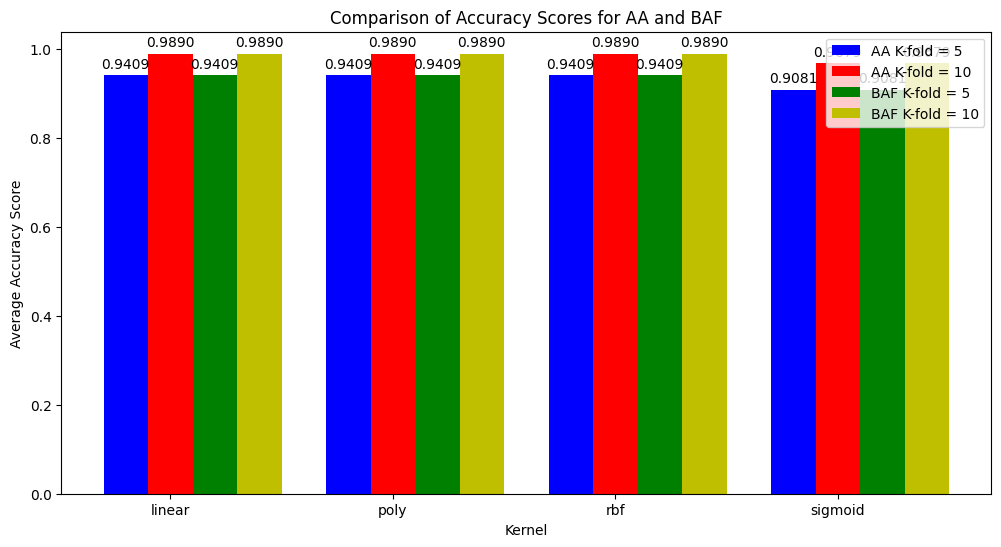

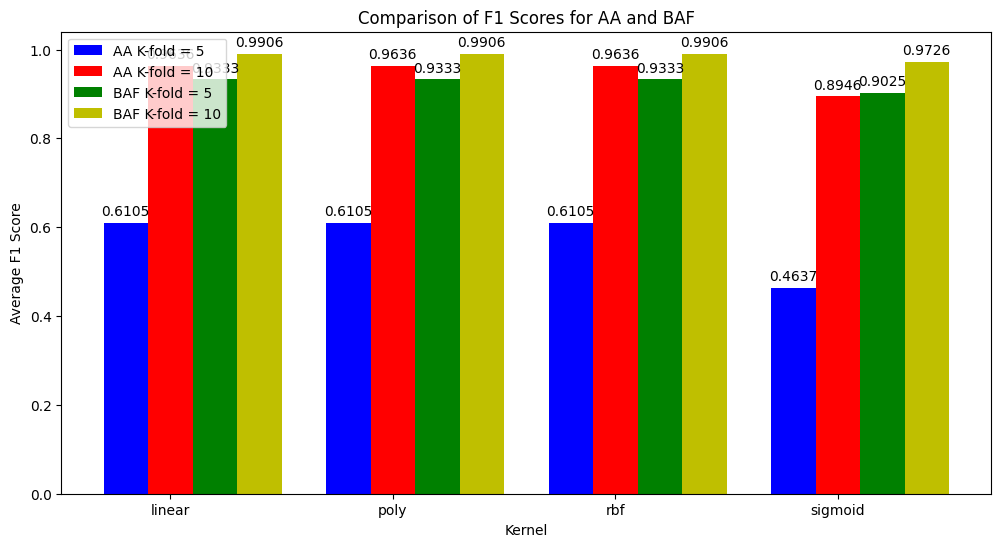

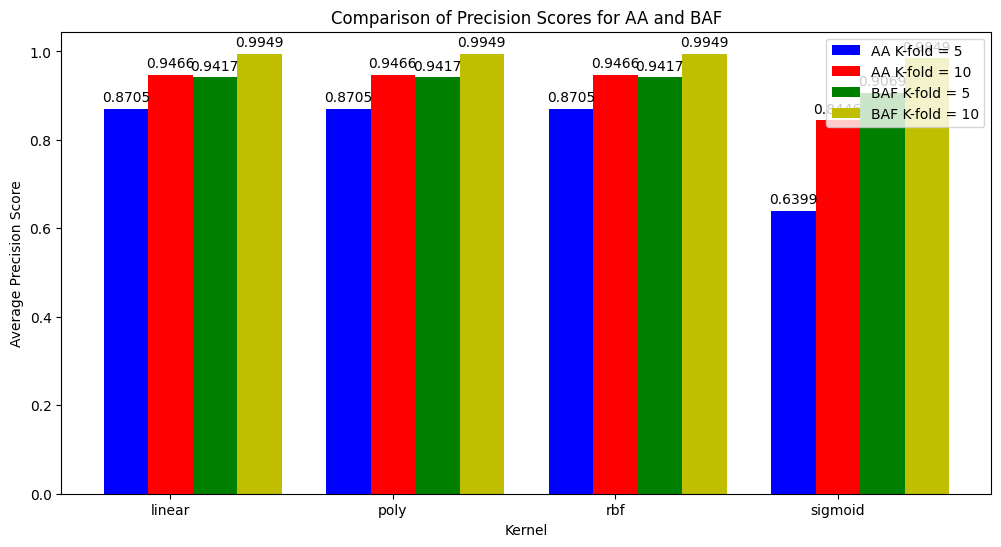

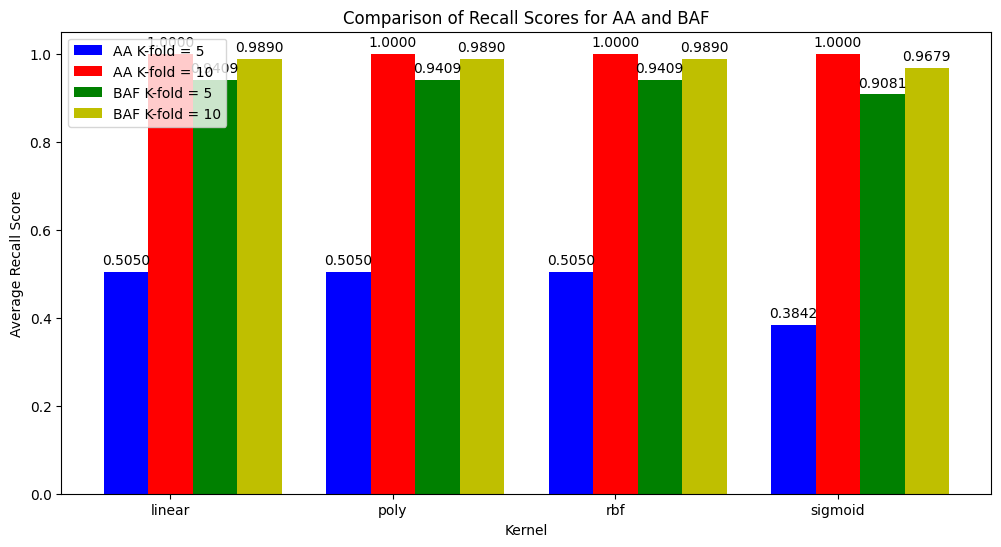

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle


#['context_speaker', 'context_speach','relation_gold', 'relation_gold_reason', 'sentence_1', 'sentence_2', 'speaker_1', 'speaker_2', 'topic']
X_baf = []
y_baf = []
for ligne in new_lignes:
    X_baf.append(ligne[0]['speakers'] + ligne[0]['phrases'] + ligne[3:])
    if ligne[1] == 'Attack':
        y_baf.append(1)
    elif ligne[1] == 'Support':
        y_baf.append(2)
    else:  # if equal Neither
        y_baf.append(0)

# Preprocess X_baf to ensure each element is a string
X_baf = [' '.join(doc) if isinstance(doc, list) else doc for doc in X_baf]

# Convert the text data to numerical data using TF-IDF
vectorizer_baf = TfidfVectorizer()
X_tfidf_baf = vectorizer_baf.fit_transform(X_baf)

# Split data into training and testing sets
X_train_baf, X_test_baf, y_train_baf, y_test_baf = train_test_split(X_tfidf_baf, y_baf, test_size=0.2, random_state=42)

# Define kernels and k-folds
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
k_fold = [5, 10]

# Initialize scores dictionaries for BAF
baf_scores_5 = {'accuracy': [], 'f1': [], 'precision': [], 'recall': []}
baf_scores_10 = {'accuracy': [], 'f1': [], 'precision': [], 'recall': []}

for kernel in kernels:
    # Création du classifieur SVM avec le noyau spécifié
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    for k in k_fold:
        # Custom scorers
        scoring = {'accuracy': 'accuracy',
                    'f1': make_scorer(f1_score, average='weighted'),
                    'precision': make_scorer(precision_score, average='weighted'),
                    'recall': make_scorer(recall_score, average='weighted')}

        # Calculate cross-validation scores
        scores = cross_val_score(clf, X_tfidf, y, cv=k, scoring='accuracy')
        f1_scores = cross_val_score(clf, X_tfidf, y, cv=k, scoring=make_scorer(f1_score, average='weighted'))
        precision_scores = cross_val_score(clf, X_tfidf, y, cv=k, scoring=make_scorer(precision_score, average='weighted'))
        recall_scores = cross_val_score(clf, X_tfidf, y, cv=k, scoring=make_scorer(recall_score, average='weighted'))

        # Affichage des résultats
        print(f"K_fold = {k}")
        print(f"Scores pour le noyau {kernel}: {scores}")
        print(f"Moyenne des scores pour le noyau {kernel}: {np.mean(scores)}")
        print(f"Moyenne F1 score pour le noyau {kernel}: {np.mean(f1_scores)}")
        print(f"Moyenne Precision score pour le noyau {kernel}: {np.mean(precision_scores)}")
        print(f"Moyenne Recall score pour le noyau {kernel}: {np.mean(recall_scores)}")
        print("\n")

        if kernel == 'poly' and k == 10:
            # Save the vectorizer and classifier
            with open('vectorizer.pkl', 'wb') as f:
                pickle.dump(vectorizer, f)
            with open('classifier.pkl', 'wb') as f:
                pickle.dump(clf, f)

        if k == 5:
            baf_scores_5['accuracy'].append(np.mean(scores))
            baf_scores_5['f1'].append(np.mean(f1_scores))
            baf_scores_5['precision'].append(np.mean(precision_scores))
            baf_scores_5['recall'].append(np.mean(recall_scores))
        else:
            baf_scores_10['accuracy'].append(np.mean(scores))
            baf_scores_10['f1'].append(np.mean(f1_scores))
            baf_scores_10['precision'].append(np.mean(precision_scores))
            baf_scores_10['recall'].append(np.mean(recall_scores))

# (Optionnel) Évaluer le modèle sur l'ensemble de test
test_predictions = clf.predict(X_test)
print("Test Accuracy:", (test_predictions == y_test).mean())

# Function to plot comparison results
def plot_comparison(aa_scores_5, aa_scores_10, baf_scores_5, baf_scores_10, metric):
    xx = range(len(kernels))  # positions for the kernels
    width = 0.2  # width of the bars

    fig, ax = plt.subplots(figsize=(12, 6))

    # Création des barres pour AA
    bar1 = ax.bar([p - width for p in xx], aa_scores_5[metric], width, label='AA K-fold = 5', color='b')
    bar2 = ax.bar(xx, aa_scores_10[metric], width, label='AA K-fold = 10', color='r')

    # Création des barres pour BAF
    bar3 = ax.bar([p + width for p in xx], baf_scores_5[metric], width, label='BAF K-fold = 5', color='g')
    bar4 = ax.bar([p + 2*width for p in xx], baf_scores_10[metric], width, label='BAF K-fold = 10', color='y')

    # Configuration des labels et du titre
    ax.set_xlabel('Kernel')
    ax.set_ylabel(f'Average {metric.capitalize()} Score')
    ax.set_title(f'Comparison of {metric.capitalize()} Scores for AA and BAF')
    ax.set_xticks(xx)
    ax.set_xticklabels(kernels)
    ax.legend()

    # Affichage des scores sur les barres
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # décalage de 3 points vers le haut
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bar1)
    autolabel(bar2)
    autolabel(bar3)
    autolabel(bar4)

    # Affichage du graphique
    plt.show()

# Plot comparison for each metric
metrics = ['accuracy', 'f1', 'precision', 'recall']
for metric in metrics:
    plot_comparison(k_fold_5_scores, k_fold_10_scores, baf_scores_5, baf_scores_10, metric)

In [9]:
import random

# Load the vectorizer and classifier
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('classifier.pkl', 'rb') as f:
    clf = pickle.load(f)


dataset  = "full_feature_extraction_dataset.csv"
with open(dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    
     # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    op = 0 
    ap = 0
    predictions = [0]

    # Nom du fichier
    filename = "result_svm_baf.csv"

    # Écriture des données dans le fichier CSV
    with open(filename, mode='w', newline='') as file:
        file.write('_unit_id$,$pair_id$,$relation_gold$,$relation_gold_reason$,$sentence_1$,$sentence_2$,$speaker_1$,$speaker_2$,$topic\n')
        
        
        while ap < 100:
            op+=1
    
            indice = random.randint(1, len(lignes)-1)  # Génère un nombre entier entre 1 et len(lignes) inclus
            #print(f'indice:{indice}')
            topic = lignes[indice][5]
            context = []
            if topic != '':
                if indice-16 < 1:
                    n = indice - 1
                    l = 16-n
                    arr = indice + 16 + l
                    dep = 1
                elif indice+16 > len(lignes):
                    n = len(lignes)-indice
                    l = 16-n
                    dep = indice - 16 - l
                    arr = len(lignes)
                else:
                    arr = indice + 16
                    dep = indice - 16
                #print(f'dep:{dep}')
                if lignes[dep][5] != topic:
                    i=0
                    i1=0
                    while lignes[dep+i1][5] != topic:
                        i1=i1+1
                    dep = dep+i1
                    if arr+i1 > len(lignes): 
                        i = arr+i1 - len(lignes)
                        arr = len(lignes)
                    else:
                        arr = arr+i1
        
                    if lignes[arr][5] != topic and i == 0:
                        i2 = 0 
                        while lignes[arr-i2][5] != topic:
                            i2=i2+1
                        arr = arr + i2
                        if i1 == 0: 
                            while  lignes[dep][5] == topic and i2>0 and dep>0:
                                i2=i2-1
                                dep = dep-1
    
                if arr-dep < 32:
                    context = lignes[dep:arr]
                    for i in range(arr-dep):
                        context.append(['','','','','','','',''])
                else:
                    context = lignes[dep:arr]
    
            ia=0
            while ia < len(context) and context[ia] != lignes[indice]:
                ia= ia+1
            if ia < len(context)-1:
                indice2 = ia+1
                #while indice2==ia:
                #    indice2 = random.randint(ia, arr-dep -1)
                cont = {'speakers': [], 'phrases': []}
                for ligne in context:
                    if ligne != context[indice2] and ligne != context[ia]:
                        cont['speakers'].append(ligne[2])
                        cont['phrases'].append(ligne[1])
            
                X_new_brut = [' '.join(cont['speakers']) + ' ' + ' '.join(cont['phrases']) + ' ' + context[ia][1] + ' ' + context[indice2][1] + ' ' + context[ia][2] + ' ' + context[indice2][2] + ' ' + context[ia][5]]
            
                # Preprocess X to ensure each element is a string
                X_new = [' '.join(doc) if isinstance(doc, list) else doc for doc in X_new_brut]
                
                # Convert the text data to numerical data using TF-IDF
                X_new_tfidf = vectorizer.transform(X_new)
            
            
                # Faire des prédictions sur les nouvelles données
                predictions = clf.predict(X_new_tfidf)
                if predictions[0] != 0 : 
                    ap+=1
                    print(predictions)
                    # Afficher les prédictions
                    print(f'sentence 1, {context[ia][2]}: {context[ia][1]}')
                    print(f'sentence 2, {context[indice2][2]}: {context[indice2][1]}')
                    if predictions[0] == 1 : 
                        print('Relationship: Attack')
                        st = '$,$'.join([
                            '0$,$0$,$Attack$,$This is an attack',
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        print(st)
                        file.write(st)
                        st = ''
                    elif predictions[0] == 2 : 
                        print('Relationship: Support')
                        st = '$,$'.join([
                            '0$,$0$,$Support$,$This is a support',
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        print(st)
                        file.write(st)
                        st = ''
        writer = csv.writer(file)

[2]
sentence 1, Chris Wallace: Looking at both of your records, I’m going to ask each of you.
sentence 2, Chris Wallace: Why should voters elect you president over your opponent in this segment, President Trump you’ll go first, two minutes.
Relationship: Support
0$,$0$,$Support$,$This is a support$,$Looking at both of your records, I'm going to ask each of you.$,$Why should voters elect you president over your opponent in this segment, President Trump you'll go first, two minutes.$,$Chris Wallace$,$Chris Wallace$,$Why They Should Be Elected

[2]
sentence 1, Joe Biden: Russia’s paying you a lot.
sentence 2, Joe Biden: China’s paying you a lot on your hotels and all your businesses all around the country, all around the world.
Relationship: Support
0$,$0$,$Support$,$This is a support$,$Russia's paying you a lot.$,$China's paying you a lot on your hotels and all your businesses all around the country, all around the world.$,$Joe Biden$,$Joe Biden$,$National Security

[2]
sentence 1, Joe B

# DECISION TREE


## Abstract Argumentation Framework

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1911
           1       1.00      1.00      1.00       238

    accuracy                           1.00      2149
   macro avg       1.00      1.00      1.00      2149
weighted avg       1.00      1.00      1.00      2149

Confusion Matrix:
 [[1911    0]
 [   0  238]]


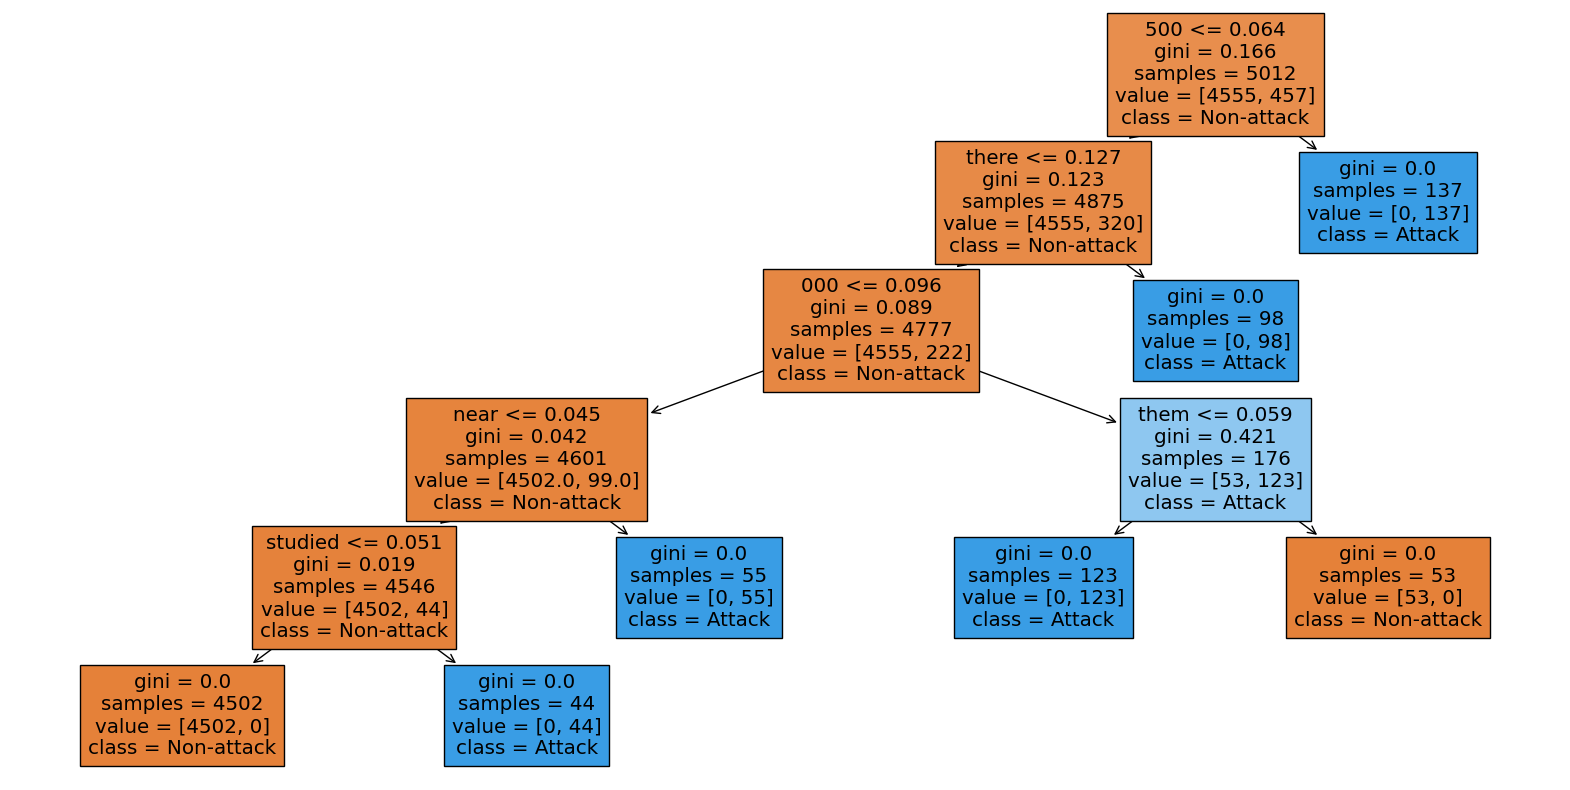

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Create dataset
X = []
y = []
for ligne in new_lignes:
    # Join speakers and phrases into single strings
    context_speakers = ' '.join(ligne[0]['speakers'])
    context_phrases = ' '.join(ligne[0]['phrases'])
    X.append(context_speakers + ' ' + context_phrases + ' ' + ' '.join(ligne[3:]))
    if ligne[1] == 'Attack':
        y.append(1)
    else:  # if equal Neither or Support
        y.append(0)

# Convert the text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Ensure we have enough samples for each class in the dataset
if len(set(y)) < 2:
    raise ValueError("The dataset must contain at least two classes.")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=1)

# Create the decision tree model
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Extract feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_names, class_names=['Non-attack', 'Attack'], filled=True)
plt.show()

# Save the vectorizer and classifier
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
with open('classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)

# Configuration du graphique
xx = range(len(kernels))  # positions pour les noyaux
width = 0.35  # largeur des barres

fig, ax = plt.subplots()



In [5]:
import random

# Load the vectorizer and classifier
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('classifier.pkl', 'rb') as f:
    clf = pickle.load(f)


dataset  = "full_feature_extraction_dataset.csv"
with open(dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    
     # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    op = 0 
    ap = 0
    predictions = [0]

    # Nom du fichier
    filename = "result_tree_aaf.csv"

    # Écriture des données dans le fichier CSV
    with open(filename, mode='w', newline='') as file:
        file.write('_unit_id$,$pair_id$,$relation_gold$,$relation_gold_reason$,$sentence_1$,$sentence_2$,$speaker_1$,$speaker_2$,$topic\n')
        
        
        while ap < 100:
            op+=1
    
            indice = random.randint(1, len(lignes)-1)  # Génère un nombre entier entre 1 et len(lignes) inclus
            #print(f'indice:{indice}')
            topic = lignes[indice][5]
            context = []
            if topic != '':
                if indice-16 < 1:
                    n = indice - 1
                    l = 16-n
                    arr = indice + 16 + l
                    dep = 1
                elif indice+16 > len(lignes):
                    n = len(lignes)-indice
                    l = 16-n
                    dep = indice - 16 - l
                    arr = len(lignes)
                else:
                    arr = indice + 16
                    dep = indice - 16
                #print(f'dep:{dep}')
                if lignes[dep][5] != topic:
                    i=0
                    i1=0
                    while lignes[dep+i1][5] != topic:
                        i1=i1+1
                    dep = dep+i1
                    if arr+i1 > len(lignes): 
                        i = arr+i1 - len(lignes)
                        arr = len(lignes)
                    else:
                        arr = arr+i1
        
                    if lignes[arr][5] != topic and i == 0:
                        i2 = 0 
                        while lignes[arr-i2][5] != topic:
                            i2=i2+1
                        arr = arr + i2
                        if i1 == 0: 
                            while  lignes[dep][5] == topic and i2>0 and dep>0:
                                i2=i2-1
                                dep = dep-1
    
                if arr-dep < 32:
                    context = lignes[dep:arr]
                    for i in range(arr-dep):
                        context.append(['','','','','','','',''])
                else:
                    context = lignes[dep:arr]
    
            ia=0
            while ia < len(context) and context[ia] != lignes[indice]:
                ia= ia+1
            if ia < len(context)-1:
                indice2 = ia+1
                #while indice2==ia:
                #    indice2 = random.randint(ia, arr-dep -1)
                cont = {'speakers': [], 'phrases': []}
                for ligne in context:
                    if ligne != context[indice2] and ligne != context[ia]:
                        cont['speakers'].append(ligne[2])
                        cont['phrases'].append(ligne[1])
            
                X_new_brut = [' '.join(cont['speakers']) + ' ' + ' '.join(cont['phrases']) + ' ' + context[ia][1] + ' ' + context[indice2][1] + ' ' + context[ia][2] + ' ' + context[indice2][2] + ' ' + context[ia][5]]
            
                # Preprocess X to ensure each element is a string
                X_new = [' '.join(doc) if isinstance(doc, list) else doc for doc in X_new_brut]
                
                # Convert the text data to numerical data using TF-IDF
                X_new_tfidf = vectorizer.transform(X_new)
            
            
                # Faire des prédictions sur les nouvelles données
                predictions = clf.predict(X_new_tfidf)
                if predictions[0] != 0 : 
                    ap+=1
                    print(predictions)
                    # Afficher les prédictions
                    print(f'sentence 1, {context[ia][2]}: {context[ia][1]}')
                    print(f'sentence 2, {context[indice2][2]}: {context[indice2][1]}')
                    if predictions[0] == 1 : 
                        print('Relationship: Attack')
                        st = '$,$'.join([
                            '0$,$0$,$Attack$,$This is an attack',
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        print(st)
                        file.write(st)
                        st = ''
        writer = csv.writer(file)

[1]
sentence 1, Kristen Welker: I have one more question in this pile then-
sentence 2, Donald Trump: Excuse me.
Relationship: Attack
0$,$0$,$Attack$,$This is an attack$,$I have one more question in this pile then-$,$Excuse me.$,$Kristen Welker$,$Donald Trump$,$Climate change

[1]
sentence 1, Donald Trump: Had that had this kind of numbers, 700,000 people would be dead right now, but it was a far less lethal disease.
sentence 2, Donald Trump: Look, his own person who ran that for him, who, as you know, was his chief of staff said, “It was catastrophic.
Relationship: Attack
0$,$0$,$Attack$,$This is an attack$,$Had that had this kind of numbers, 700,000 people would be dead right now, but it was a far less lethal disease.$,$Look, his own person who ran that for him, who, as you know, was his chief of staff said, “It was catastrophic.$,$Donald Trump$,$Donald Trump$,$COVID

[1]
sentence 1, Donald Trump: Not true-
sentence 2, Donald Trump: … where they want to take out the cows too.
Relatio

## Bipolar Argumentation Framework

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1446
           1       1.00      1.00      1.00       238
           2       1.00      1.00      1.00       465

    accuracy                           1.00      2149
   macro avg       1.00      1.00      1.00      2149
weighted avg       1.00      1.00      1.00      2149

Confusion Matrix:
 [[1446    0    0]
 [   0  238    0]
 [   0    0  465]]


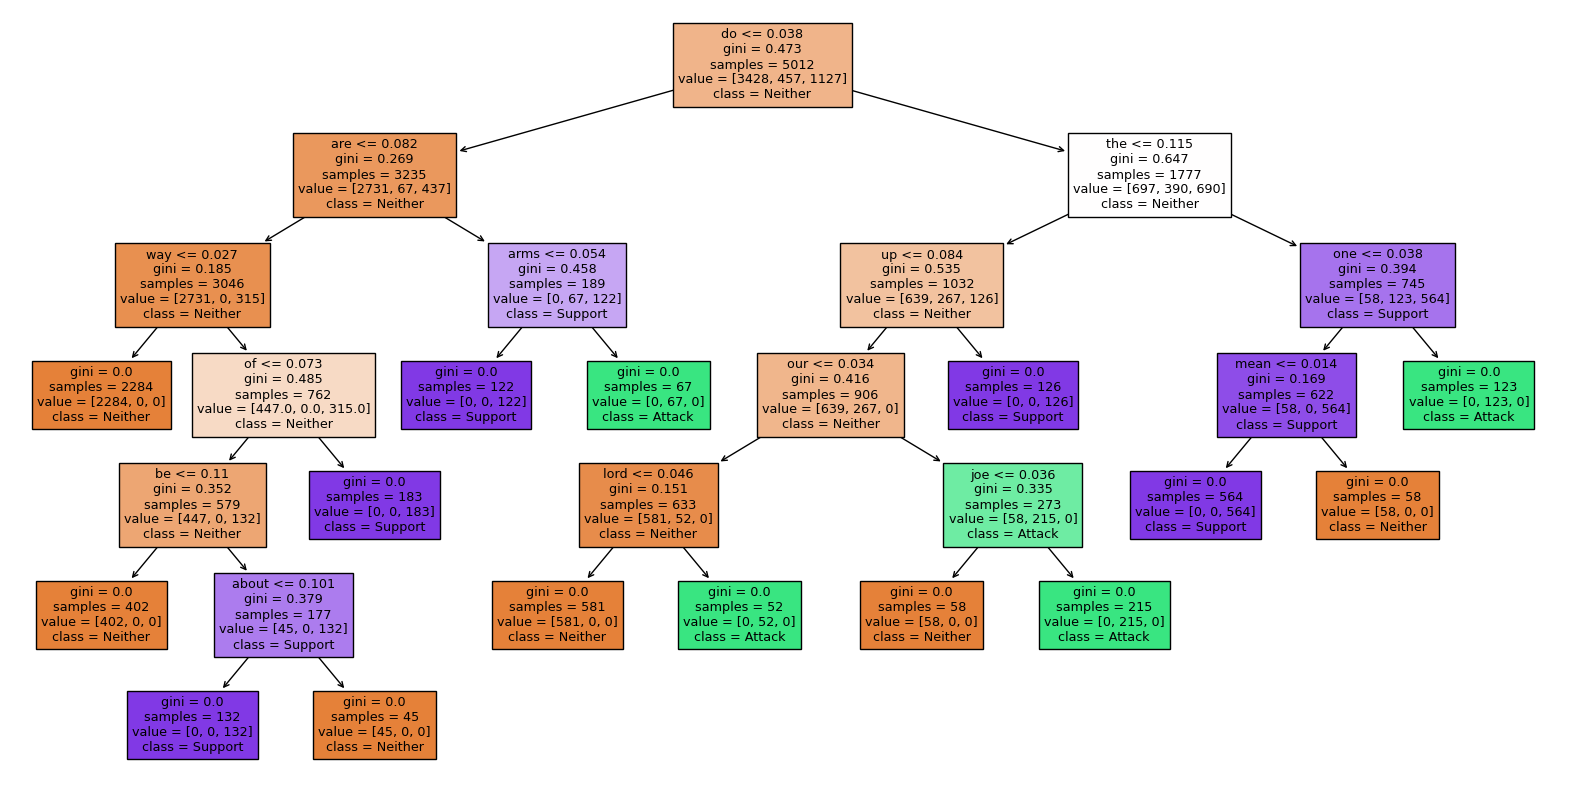

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Create dataset
X = []
y = []
for ligne in new_lignes:
    # Join speakers and phrases into single strings
    context_speakers = ' '.join(ligne[0]['speakers'])
    context_phrases = ' '.join(ligne[0]['phrases'])
    X.append(context_speakers + ' ' + context_phrases + ' ' + ' '.join(ligne[3:]))
    if ligne[1] == 'Attack':
        y.append(1)
    elif ligne[1] == 'Support':
        y.append(2)
    else:  # if equal Neither
        y.append(0)

# Convert the text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Ensure we have enough samples for each class in the dataset
if len(set(y)) < 2:
    raise ValueError("The dataset must contain at least two classes.")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=1)

# Create the decision tree model
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Extract feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_names, class_names=['Neither', 'Attack', 'Support'], filled=True)
plt.show()


In [11]:
import random

# Load the vectorizer and classifier
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('classifier.pkl', 'rb') as f:
    clf = pickle.load(f)


dataset  = "full_feature_extraction_dataset.csv"
with open(dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    
     # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    op = 0 
    ap = 0
    predictions = [0]

    # Nom du fichier
    filename = "result_tree_baf.csv"

    # Écriture des données dans le fichier CSV
    with open(filename, mode='w', newline='') as file:
        file.write('_unit_id$,$pair_id$,$relation_gold$,$relation_gold_reason$,$sentence_1$,$sentence_2$,$speaker_1$,$speaker_2$,$topic\n')
        
        
        while ap < 100:
            op+=1
    
            indice = random.randint(1, len(lignes)-1)  # Génère un nombre entier entre 1 et len(lignes) inclus
            #print(f'indice:{indice}')
            topic = lignes[indice][5]
            context = []
            if topic != '':
                if indice-16 < 1:
                    n = indice - 1
                    l = 16-n
                    arr = indice + 16 + l
                    dep = 1
                elif indice+16 > len(lignes):
                    n = len(lignes)-indice
                    l = 16-n
                    dep = indice - 16 - l
                    arr = len(lignes)
                else:
                    arr = indice + 16
                    dep = indice - 16
                #print(f'dep:{dep}')
                if lignes[dep][5] != topic:
                    i=0
                    i1=0
                    while lignes[dep+i1][5] != topic:
                        i1=i1+1
                    dep = dep+i1
                    if arr+i1 > len(lignes): 
                        i = arr+i1 - len(lignes)
                        arr = len(lignes)
                    else:
                        arr = arr+i1
        
                    if lignes[arr][5] != topic and i == 0:
                        i2 = 0 
                        while lignes[arr-i2][5] != topic:
                            i2=i2+1
                        arr = arr + i2
                        if i1 == 0: 
                            while  lignes[dep][5] == topic and i2>0 and dep>0:
                                i2=i2-1
                                dep = dep-1
    
                if arr-dep < 32:
                    context = lignes[dep:arr]
                    for i in range(arr-dep):
                        context.append(['','','','','','','',''])
                else:
                    context = lignes[dep:arr]
    
            ia=0
            while ia < len(context) and context[ia] != lignes[indice]:
                ia= ia+1
            if ia < len(context)-1:
                indice2 = ia+1
                #while indice2==ia:
                #    indice2 = random.randint(ia, arr-dep -1)
                cont = {'speakers': [], 'phrases': []}
                for ligne in context:
                    if ligne != context[indice2] and ligne != context[ia]:
                        cont['speakers'].append(ligne[2])
                        cont['phrases'].append(ligne[1])
            
                X_new_brut = [' '.join(cont['speakers']) + ' ' + ' '.join(cont['phrases']) + ' ' + context[ia][1] + ' ' + context[indice2][1] + ' ' + context[ia][2] + ' ' + context[indice2][2] + ' ' + context[ia][5]]
            
                # Preprocess X to ensure each element is a string
                X_new = [' '.join(doc) if isinstance(doc, list) else doc for doc in X_new_brut]
                
                # Convert the text data to numerical data using TF-IDF
                X_new_tfidf = vectorizer.transform(X_new)
            
            
                # Faire des prédictions sur les nouvelles données
                predictions = clf.predict(X_new_tfidf)
                if predictions[0] != 0 : 
                    ap+=1
                    print(predictions)
                    # Afficher les prédictions
                    print(f'sentence 1, {context[ia][2]}: {context[ia][1]}')
                    print(f'sentence 2, {context[indice2][2]}: {context[indice2][1]}')
                    if predictions[0] == 1 : 
                        print('Relationship: Attack')
                        st = '$,$'.join([
                            '0$,$0$,$Attack$,$This is an attack',
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        print(st)
                        file.write(st)
                        st = ''
                    elif predictions[0] == 2 : 
                        print('Relationship: Support')
                        st = '$,$'.join([
                            '0$,$0$,$Support$,$This is a support',
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        print(st)
                        file.write(st)
                        st = ''
        writer = csv.writer(file)

[2]
sentence 1, Chris Wallace: Vice President Biden, you say it’s more of a K-shape.
sentence 2, Chris Wallace: What difference does that mean to the American people in terms of the economy?
Relationship: Support
0$,$0$,$Support$,$This is a support$,$Vice President Biden, you say it's more of a K-shape.$,$What difference does that mean to the American people in terms of the economy?$,$Chris Wallace$,$Chris Wallace$,$Economy

[1]
sentence 1, Joe Biden: By the way, the whole idea of what this is all going to do, it’s going to create millions of jobs and it’s going to clean the environment.
sentence 2, Joe Biden: Our health and our jobs are at stake.
Relationship: Attack
0$,$0$,$Attack$,$This is an attack$,$By the way, the whole idea of what this is all going to do, it's going to create millions of jobs and it's going to clean the environment.$,$Our health and our jobs are at stake.$,$Joe Biden$,$Joe Biden$,$Climate change

[1]
sentence 1, Joe Biden: There is no [crosstalk 01:05:32]… Ther

# Random Forest

## Abstract Argumentation Framework

In [6]:
from sklearn.ensemble import RandomForestClassifier  # ou RandomForestRegressor pour la régression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # ou d'autres métriques selon le problème
import pickle

# Create dataset
X = []
y = []
for ligne in new_lignes:
    # Join speakers and phrases into single strings
    context_speakers = ' '.join(ligne[0]['speakers'])
    context_phrases = ' '.join(ligne[0]['phrases'])
    X.append(context_speakers + ' ' + context_phrases + ' ' + ' '.join(ligne[3:]))
    if ligne[1] == 'Attack':
        y.append(1)
    else:  # if equal Neither
        y.append(0)

# Convert the text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Ensure we have enough samples for each class in the dataset
if len(set(y)) < 2:
    raise ValueError("The dataset must contain at least two classes.")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)  # ajustez les hyperparamètres au besoin
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Save the vectorizer and classifier
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
with open('classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)


Accuracy: 1.0


In [7]:
import random

# Load the vectorizer and classifier
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('classifier.pkl', 'rb') as f:
    clf = pickle.load(f)


dataset  = "full_feature_extraction_dataset.csv"
with open(dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    
     # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    op = 0 
    ap = 0
    predictions = [0]

    # Nom du fichier
    filename = "result_forest_aaf.csv"

    # Écriture des données dans le fichier CSV
    with open(filename, mode='w', newline='') as file:
        file.write('_unit_id$,$pair_id$,$relation_gold$,$relation_gold_reason$,$sentence_1$,$sentence_2$,$speaker_1$,$speaker_2$,$topic\n')
        
        
        while ap < 100:
            op+=1
    
            indice = random.randint(1, len(lignes)-1)  # Génère un nombre entier entre 1 et len(lignes) inclus
            #print(f'indice:{indice}')
            topic = lignes[indice][5]
            context = []
            if topic != '':
                if indice-16 < 1:
                    n = indice - 1
                    l = 16-n
                    arr = indice + 16 + l
                    dep = 1
                elif indice+16 > len(lignes):
                    n = len(lignes)-indice
                    l = 16-n
                    dep = indice - 16 - l
                    arr = len(lignes)
                else:
                    arr = indice + 16
                    dep = indice - 16
                #print(f'dep:{dep}')
                if lignes[dep][5] != topic:
                    i=0
                    i1=0
                    while lignes[dep+i1][5] != topic:
                        i1=i1+1
                    dep = dep+i1
                    if arr+i1 > len(lignes): 
                        i = arr+i1 - len(lignes)
                        arr = len(lignes)
                    else:
                        arr = arr+i1
        
                    if lignes[arr][5] != topic and i == 0:
                        i2 = 0 
                        while lignes[arr-i2][5] != topic:
                            i2=i2+1
                        arr = arr + i2
                        if i1 == 0: 
                            while  lignes[dep][5] == topic and i2>0 and dep>0:
                                i2=i2-1
                                dep = dep-1
    
                if arr-dep < 32:
                    context = lignes[dep:arr]
                    for i in range(arr-dep):
                        context.append(['','','','','','','',''])
                else:
                    context = lignes[dep:arr]
    
            ia=0
            while ia < len(context) and context[ia] != lignes[indice]:
                ia= ia+1
            if ia < len(context)-1:
                indice2 = ia+1
                #while indice2==ia:
                #    indice2 = random.randint(ia, arr-dep -1)
                cont = {'speakers': [], 'phrases': []}
                for ligne in context:
                    if ligne != context[indice2] and ligne != context[ia]:
                        cont['speakers'].append(ligne[2])
                        cont['phrases'].append(ligne[1])
            
                X_new_brut = [' '.join(cont['speakers']) + ' ' + ' '.join(cont['phrases']) + ' ' + context[ia][1] + ' ' + context[indice2][1] + ' ' + context[ia][2] + ' ' + context[indice2][2] + ' ' + context[ia][5]]
            
                # Preprocess X to ensure each element is a string
                X_new = [' '.join(doc) if isinstance(doc, list) else doc for doc in X_new_brut]
                
                # Convert the text data to numerical data using TF-IDF
                X_new_tfidf = vectorizer.transform(X_new)
            
            
                # Faire des prédictions sur les nouvelles données
                predictions = clf.predict(X_new_tfidf)
                if predictions[0] != 0 : 
                    ap+=1
                    print(predictions)
                    # Afficher les prédictions
                    print(f'sentence 1, {context[ia][2]}: {context[ia][1]}')
                    print(f'sentence 2, {context[indice2][2]}: {context[indice2][1]}')
                    if predictions[0] == 1 : 
                        print('Relationship: Attack')
                        st = '$,$'.join([
                            '0$,$0$,$Attack$,$This is an attack',
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        print(st)
                        file.write(st)
                        st = ''
        writer = csv.writer(file)

[1]
sentence 1, Joe Biden: There is no [crosstalk 01:05:32]… There is no evidence of that-
sentence 2, Donald Trump: This is not going to end well.
Relationship: Attack
0$,$0$,$Attack$,$This is an attack$,$There is no /crosstalk 01:05:32/… There is no evidence of that-$,$This is not going to end well.$,$Joe Biden$,$Donald Trump$,$Integrity

[1]
sentence 1, Donald Trump: If you look at what he wants to do, if you look at his plan, his-
sentence 2, Joe Biden: [crosstalk 00:16:56].
Relationship: Attack
0$,$0$,$Attack$,$This is an attack$,$If you look at what he wants to do, if you look at his plan, his-$,$/crosstalk 00:16:56/.$,$Donald Trump$,$Joe Biden$,$Climate change

[1]
sentence 1, Donald Trump: Who built the cages, Joe?
sentence 2, Joe Biden: Let’s talk about what we’re talking about.
Relationship: Attack
0$,$0$,$Attack$,$This is an attack$,$Who built the cages, Joe?$,$Let's talk about what we're talking about.$,$Donald Trump$,$Joe Biden$,$Minimum wage

[1]
sentence 1, Joe Biden: Th

## Bipolar Argumentation Framework

In [12]:
from sklearn.ensemble import RandomForestClassifier  # ou RandomForestRegressor pour la régression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # ou d'autres métriques selon le problème
import pickle

# Create dataset
X = []
y = []
for ligne in new_lignes:
    context_speakers = ' '.join(ligne[0]['speakers'])
    context_phrases = ' '.join(ligne[0]['phrases'])
    X.append(context_speakers + ' ' + context_phrases + ' ' + ' '.join(ligne[3:]))
    if ligne[1] == 'Attack':
        y.append(1)
    elif ligne[1] == 'Support':  # Utilisation de elif pour éviter les doublons
        y.append(2)
    else:  # Si ni 'Attack' ni 'Support'
        y.append(0)

# Convert the text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Ensure we have enough samples for each class in the dataset
if len(set(y)) < 2:
    raise ValueError("The dataset must contain at least two classes.")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Create RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Save the vectorizer and classifier
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
with open('classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)



Accuracy: 1.0


In [14]:
import random

# Load the vectorizer and classifier
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('classifier.pkl', 'rb') as f:
    clf = pickle.load(f)


dataset  = "full_feature_extraction_dataset.csv"
with open(dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    
     # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    op = 0 
    ap = 0
    predictions = [0]

    # Nom du fichier
    filename = "result_forest_baf.csv"

    # Écriture des données dans le fichier CSV
    with open(filename, mode='w', newline='') as file:
        file.write('_unit_id$,$pair_id$,$relation_gold$,$relation_gold_reason$,$sentence_1$,$sentence_2$,$speaker_1$,$speaker_2$,$topic\n')
        
        
        while ap < 100:
            op+=1
    
            indice = random.randint(1, len(lignes)-1)  # Génère un nombre entier entre 1 et len(lignes) inclus
            #print(f'indice:{indice}')
            topic = lignes[indice][5]
            context = []
            if topic != '':
                if indice-16 < 1:
                    n = indice - 1
                    l = 16-n
                    arr = indice + 16 + l
                    dep = 1
                elif indice+16 > len(lignes):
                    n = len(lignes)-indice
                    l = 16-n
                    dep = indice - 16 - l
                    arr = len(lignes)
                else:
                    arr = indice + 16
                    dep = indice - 16
                #print(f'dep:{dep}')
                if lignes[dep][5] != topic:
                    i=0
                    i1=0
                    while lignes[dep+i1][5] != topic:
                        i1=i1+1
                    dep = dep+i1
                    if arr+i1 > len(lignes): 
                        i = arr+i1 - len(lignes)
                        arr = len(lignes)
                    else:
                        arr = arr+i1
        
                    if lignes[arr][5] != topic and i == 0:
                        i2 = 0 
                        while lignes[arr-i2][5] != topic:
                            i2=i2+1
                        arr = arr + i2
                        if i1 == 0: 
                            while  lignes[dep][5] == topic and i2>0 and dep>0:
                                i2=i2-1
                                dep = dep-1
    
                if arr-dep < 32:
                    context = lignes[dep:arr]
                    for i in range(arr-dep):
                        context.append(['','','','','','','',''])
                else:
                    context = lignes[dep:arr]
    
            ia=0
            while ia < len(context) and context[ia] != lignes[indice]:
                ia= ia+1
            if ia < len(context)-1:
                indice2 = ia+1
                #while indice2==ia:
                #    indice2 = random.randint(ia, arr-dep -1)
                cont = {'speakers': [], 'phrases': []}
                for ligne in context:
                    if ligne != context[indice2] and ligne != context[ia]:
                        cont['speakers'].append(ligne[2])
                        cont['phrases'].append(ligne[1])
            
                X_new_brut = [' '.join(cont['speakers']) + ' ' + ' '.join(cont['phrases']) + ' ' + context[ia][1] + ' ' + context[indice2][1] + ' ' + context[ia][2] + ' ' + context[indice2][2] + ' ' + context[ia][5]]
            
                # Preprocess X to ensure each element is a string
                X_new = [' '.join(doc) if isinstance(doc, list) else doc for doc in X_new_brut]
                
                # Convert the text data to numerical data using TF-IDF
                X_new_tfidf = vectorizer.transform(X_new)
            
            
                # Faire des prédictions sur les nouvelles données
                predictions = clf.predict(X_new_tfidf)
                if predictions[0] != 0 : 
                    ap+=1
                    print(predictions)
                    # Afficher les prédictions
                    print(f'sentence 1, {context[ia][2]}: {context[ia][1]}')
                    print(f'sentence 2, {context[indice2][2]}: {context[indice2][1]}')
                    if predictions[0] == 1 : 
                        print('Relationship: Attack')
                        st = '$,$'.join([
                            '0$,$0$,$Attack$,$This is an attack',
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        print(st)
                        file.write(st)
                        st = ''
                    elif predictions[0] == 2 : 
                        print('Relationship: Support')
                        st = '$,$'.join([
                            '0$,$0$,$Support$,$This is a support',
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        print(st)
                        file.write(st)
                        st = ''
        writer = csv.writer(file)

[2]
sentence 1, Donald Trump: Maybe you can do it right now.
sentence 2, Kristen Welker: Vice-President Biden, you may respond-
Relationship: Support
0$,$0$,$Support$,$This is a support$,$Maybe you can do it right now.$,$Vice-President Biden, you may respond-$,$Donald Trump$,$Kristen Welker$,$National Security

[2]
sentence 1, Joe Biden: We’ve got to figure out how we’re going to move forward here.”
sentence 2, Joe Biden: Because there’s so many things we really do agree on.
Relationship: Support
0$,$0$,$Support$,$This is a support$,$We've got to figure out how we're going to move forward here.”$,$Because there's so many things we really do agree on.$,$Joe Biden$,$Joe Biden$,$Democracy

[2]
sentence 1, Joe Biden: They’re not my personal lawyer.
sentence 2, George Stephanopoulos: So, you’re not going to rule it in or rule it out?
Relationship: Support
0$,$0$,$Support$,$This is a support$,$They're not my personal lawyer.$,$So, you're not going to rule it in or rule it out?$,$Joe Biden$,$